# Interrogating and Inspecting the Data

One of the most important first steps of any data science exercise is gaining a simple understanding of what the data you're working with is actually made up of.

This notebook is going to cover all of the basics of statistical analysis and working with you data on a "first principles" basis.

Make sure you've gone through [this notebook](../uploading-and-inspecting-data/notebook.ipynb) first, to understand how we upload the data we want to inspect!

In [2]:
import pandas as pd

file_path = '../data/data.csv'

df = pd.read_csv(file_path)

print(df)

                        search_query        time platform
0              vacation spots recipe  1722760240   mobile
1           what is invest in crypto  1734252942   mobile
2                    AI tools recipe  1728010297  desktop
3               best camera symptoms  1730697978   mobile
4            best meditation near me  1735175397   mobile
...                              ...         ...      ...
9995     best vacation spots near me  1724048159   mobile
9996                best flu near me  1712704022  desktop
9997                can I cook pasta  1735612619  desktop
9998     best get a mortgage near me  1723209855  desktop
9999  best electric vehicles near me  1724506448   mobile

[10000 rows x 3 columns]


## Great first steps

The first thing you want to do as a data scientist working with a new dataset is get a basic understanding of what you've got in front of you. In order to familiarize yourself with such concepts in this datasets, lets use the `value_counts()` function to inspect the frequency of each of our underlying platform types!

In [3]:
# Use the value_counts() function here, targeting the platform column
platform_counts = df['platform'].value_counts()

print("Search query counts by platform:")
print(platform_counts)

Search query counts by platform:
platform
mobile     5065
desktop    4935
Name: count, dtype: int64


In [9]:
# Let's have a look at the proportions of each value more directly

norm_platform_counts = df['platform'].value_counts(normalize=True)

print("Normalized query counts by platform:")
print(norm_platform_counts)

Normalized query counts by platform:
platform
mobile     0.5065
desktop    0.4935
Name: proportion, dtype: float64


In [20]:
# But what if we want to see them as proper percentages?

platform_percent = df['platform'].value_counts(normalize=True) * 100
platform_percent = platform_percent.map("{:.2f}%".format)

print("Platform usage breakdown:")
print(platform_percent)

Platform usage breakdown:
platform
mobile     50.65%
desktop    49.35%
Name: proportion, dtype: object


## Something a little more complicated

Our `time` column is in [Unix time](https://en.wikipedia.org/wiki/Unix_time), which is a count of seconds from the so-called epoch. Read more on Wikipedia if you'd like to learn about the history of this value, as it's quite interesting!

How can we, as data scientists, parse this value into something that's meaningful for us to work with?

If you'd like to customize the `to_datetime` function, the [pandas documentation](https://tedboy.github.io/pandas/generated/pandas.to_datetime.html) has the information you might need!



In [25]:
# Convert the 'time' column from UNIX time to a readable datetime format
df['datetime'] = pd.to_datetime(df['time'], unit='s')

# Show the first few rows to confirm the conversion worked
df[['time', 'datetime']].head()


,time,datetime
0,1722760240,2024-08-04 08:30:40
1,1734252942,2024-12-15 08:55:42
2,1728010297,2024-10-04 02:51:37
3,1730697978,2024-11-04 05:26:18
4,1735175397,2024-12-26 01:09:57


## But now what?

Okay, great! We've converted our Unix time column into something a little more readable. But now what? We still aren't able to make very many meaningful observations from a list of 10,0000 datatimes!

A great next step is to get an idea of the observed time period of our data.

In [26]:
print("Time range of search queries:")
print("Earliest:", df['datetime'].min())
print("Latest:  ", df['datetime'].max())


Time range of search queries:
Earliest: 2024-03-28 07:47:41
Latest:   2025-03-28 07:30:25


## And then...

So we understand now that our data is looking at a window from March 28, 2024 all the way up to March 28, 2025. Let's have a look at some trends by creating visualizations that will show any seasonality in our data.

In makes sense to look at query counts by month, by hour of the day, and by day of the week in this context.

In [28]:
# The first thing we need to do is define some of our global matplotlib variables.
import matplotlib.pyplot as plt

# Let's get some of the important values out of our newly created datetime plot.
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()


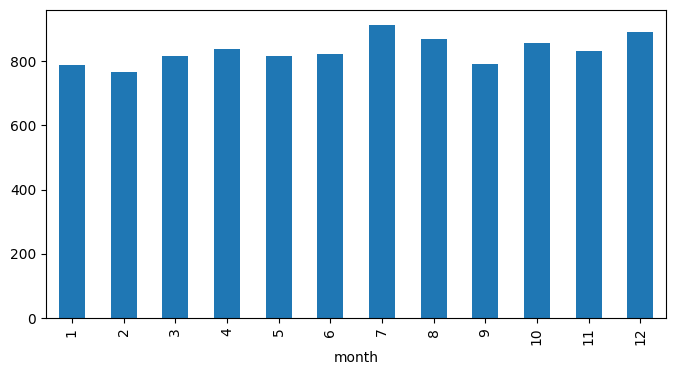

In [44]:
# Count number of queries by month
monthly_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
monthly_counts.plot(kind='bar')
plt.show()

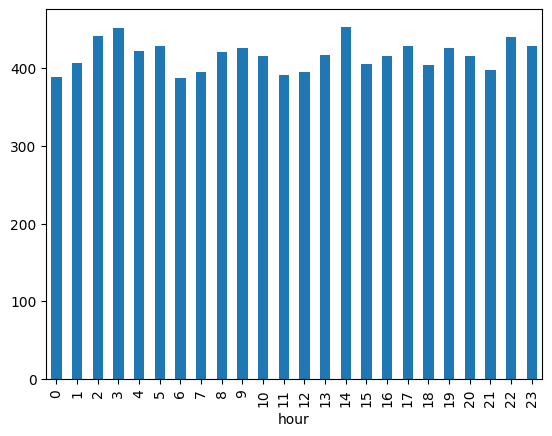

In [37]:
#

# Count number of queries by hour (0–23)
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure()
hourly_counts.plot(kind='bar')
plt.show()

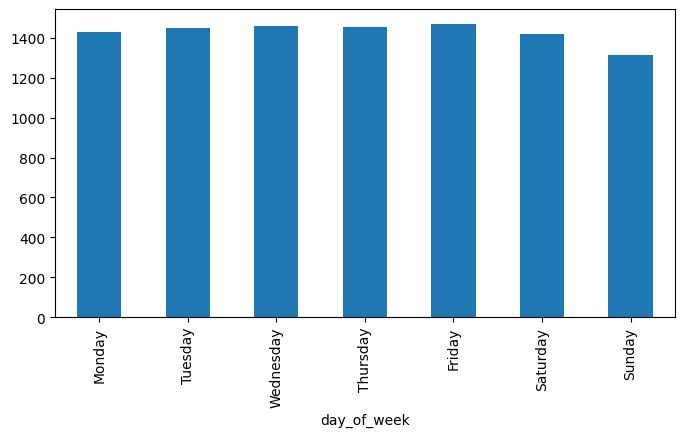

In [38]:
#

# Count number of queries by day of the week (in correct order)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_counts = df['day_of_week'].value_counts().reindex(ordered_days)

plt.figure(figsize=(8, 4))
weekly_counts.plot(kind='bar')
plt.show()